In [1]:
# Simple function
def calculate(x):
  return x**2

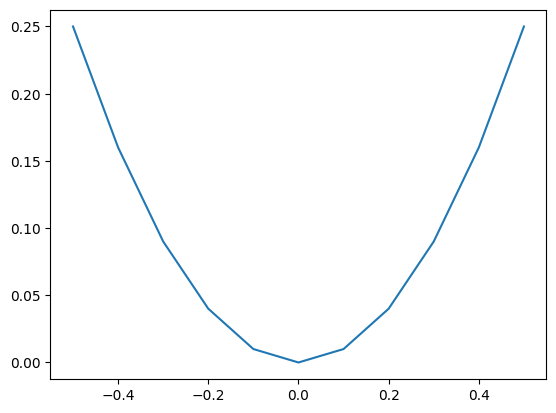

In [2]:
import matplotlib.pyplot as plt

# Define inputs
inputs = [-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5]
# Calculate outputs
outputs = [calculate(x) for x in inputs]
# Plot the result
plt.plot(inputs, outputs)
plt.show()

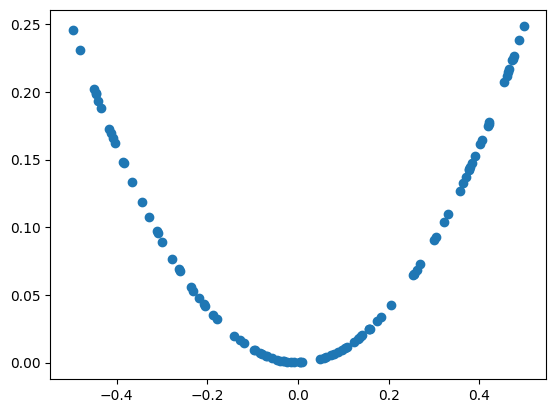

In [3]:
# Example of generating random samples from X^2
from numpy.random import rand
from numpy import hstack
from numpy import ones, zeros

def generate_samples(n=100):
  X1 = rand(n) - 0.5
  X2 = X1**2
  X1 = X1.reshape(n, 1)
  X2 = X2.reshape(n, 1)
  return hstack((X1, X2)) 

data = generate_samples()
plt.scatter(data[:, 0], data[:, 1])
plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                75        
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


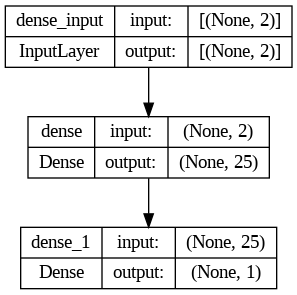

In [4]:
# Define the standalone discriminator model
from tensorflow import keras

def define_discriminator(n_inputs=2):
  model = keras.Sequential([
      keras.layers.Dense(25, activation="relu", kernel_initializer="he_uniform", input_dim=n_inputs),
      keras.layers.Dense(1, activation="sigmoid")
  ])

  model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
  return model

model = define_discriminator()
model.summary()
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [5]:
# Generate n real samples with class labels
def generate_real_samples(n): 
  X1 = rand(n) - 0.5
  X2 = X1**2
  X1 = X1.reshape(n, 1)
  X2 = X2.reshape(n, 1)
  X = hstack((X1, X2))
  y = ones((n, 1))
  return X, y

In [6]:
# Generate n fake samples with class labels
def generate_fake_samples(n):
  X1 = -1 + rand(n) * 2
  X2 = -1 + rand(n) * 2
  X1 = X1.reshape(n, 1)
  X2 = X2.reshape(n, 1)
  X = hstack((X1, X2))
  y = zeros((n, 1))
  return X, y

In [7]:
# Train the discriminator model
def train_discriminator(model, n_epochs=1000, n_batch=128):
  half_batch = int(n_batch / 2)
  # Run epochs manually
  for i in range(n_epochs):
    # Generate real examples
    X_real, y_real = generate_real_samples(half_batch)
    # Update the model
    model.train_on_batch(X_real, y_real)  

    # Generate fake examples
    X_fake, y_fake = generate_fake_samples(half_batch)
    # Update the model
    model.train_on_batch(X_fake, y_fake) 
    
    # Evaluate the model
    _, acc_real = model.evaluate(X_real, y_real, verbose=0)
    _, acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
    print(i, acc_real, acc_fake)

In [8]:
train_discriminator(model)

0 0.59375 0.421875
1 0.4375 0.390625
2 0.484375 0.34375
3 0.5625 0.5
4 0.46875 0.453125
5 0.390625 0.453125
6 0.453125 0.40625
7 0.515625 0.5
8 0.515625 0.484375
9 0.5 0.40625
10 0.390625 0.375
11 0.5625 0.40625
12 0.53125 0.40625
13 0.671875 0.484375
14 0.40625 0.46875
15 0.453125 0.53125
16 0.5625 0.5
17 0.625 0.5
18 0.578125 0.46875
19 0.375 0.5
20 0.5625 0.453125
21 0.46875 0.59375
22 0.515625 0.515625
23 0.5 0.59375
24 0.484375 0.53125
25 0.46875 0.59375
26 0.515625 0.578125
27 0.5625 0.640625
28 0.40625 0.609375
29 0.515625 0.484375
30 0.515625 0.53125
31 0.4375 0.53125
32 0.484375 0.640625
33 0.546875 0.5
34 0.453125 0.578125
35 0.5625 0.578125
36 0.609375 0.671875
37 0.5625 0.609375
38 0.46875 0.546875
39 0.515625 0.75
40 0.53125 0.578125
41 0.625 0.5625
42 0.421875 0.703125
43 0.546875 0.53125
44 0.515625 0.53125
45 0.53125 0.609375
46 0.5625 0.5625
47 0.46875 0.671875
48 0.5 0.609375
49 0.46875 0.609375
50 0.53125 0.59375
51 0.453125 0.71875
52 0.5625 0.703125
53 0.484375 0.7

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 15)                90        
                                                                 
 dense_5 (Dense)             (None, 2)                 32        
                                                                 
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


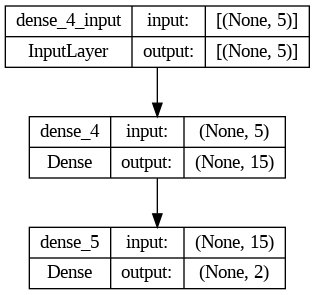

In [12]:
# Define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
  model = keras.Sequential([
      keras.layers.Dense(15, activation="relu", kernel_initializer="he_uniform", input_dim=latent_dim),
      keras.layers.Dense(n_outputs, activation="linear")
  ])
  return model

model = define_generator(5)
model.summary()
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [14]:
import numpy as np

def generate_latent_points(latent_dim, n):
  x_input = np.random.randn(latent_dim * n)
  x_input = x_input.reshape(n, latent_dim)
  return x_input

In [16]:
generate_latent_points(5, 10).shape

(10, 5)

In [35]:
# Generate n fake examples
def generate_fake_samples(generator, latent_dim, n):
  # Generate points in latent space
  x_input = generate_latent_points(latent_dim, n)
  # Predict outptus
  X = generator.predict(x_input)
  y = zeros((n, 1)) 
  return X, y

In [ ]:
latent_dim = 5
model = define_generator(latent_dim)
generate_fake_samples(model, latent_dim, 100)

In [37]:
# Define the combined generator and discriinator model, for updating the generator
def define_gan(generator, discriminator):
  # Make weights in the discriminator not trainable
  discriminator.trainable = False
  # Connect them
  model = keras.Sequential([
      generator, 
      discriminator
  ])
  model.compile(loss="binary_crossentropy", optimizer="adam")
  return model

In [38]:
discriminator = define_discriminator()
generator = define_generator(latent_dim)

gan_model = define_gan(generator, discriminator)

In [39]:
# Train the composite model
def train_gan(gan_model, latent_dim, n_epochs=10000, n_batch=128):
  # Manually enumerate epochs
  for i in range(n_epochs):
    # Prepare points in latent space as input for the generator
    x_gan = generate_latent_points(latent_dim, n_batch)
    # Create inverted labels for fake samples
    y_gan = ones((n_batch, 1))
    # Update the generator via the discriminator's error
    gan_model.train_on_batch(x_gan, y_gan)

In [41]:
def summarize_performance(epoch, generator, latent_dim, n=100):
  x_real, y_real = generate_real_samples(n)
  _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
  x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
  _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
  print(epoch, acc_real, acc_fake)
  plt.scatter(x_real[:, 0], x_real[:, 1], c='r')
  plt.scatter(x_fake[:, 0], x_fake[:, 1], c='blue')
  plt.show()

In [42]:
# Train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128, n_eval=2000):
  # Determine half the size of one batch for updating the discriminator
  half_batch = int(n_batch / 2)
  # Manually enumerate epochs
  for i in range(n_epochs): 
    # Prepare real samples
    x_real, y_real = generate_real_samples(half_batch)
    # Prepare fake samples
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
    # Update the disctiminator
    d_model.train_on_batch(x_real, y_real)
    d_model.train_on_batch(x_fake, y_fake) 
    # Prepare points in latent space as input for the generator
    x_gan = generate_latent_points(latent_dim, n_batch)
    y_gan = ones((n_batch, 1))
    gan_model.train_on_batch(x_gan, y_gan)
    if (i+1) % n_eval == 0: 
      summarize_performance(i, g_model, d_model, latent_dim)

In [43]:
# size of the latent space 
latent_dim = 5 
# create the discriminator 
discriminator = define_discriminator() 
# create the generator 
generator = define_generator(latent_dim) 
# create the gan 
gan_model = define_gan(generator, discriminator) 
# train model
train(generator, discriminator, gan_model, latent_dim)

2/2 [==============================] - 0s 5ms/step


TypeError: ignored